<a href="https://colab.research.google.com/github/msurun/StockRecommendation/blob/main/PyStockRecommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# install needed non-standard libraries

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 10.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

# load libraries

In [ ]:
import yfinance as yf
import pandas as pd
import requests
import time
import numpy as np

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn import preprocessing

#avAPI = 'S8CPGB36QUA6E907'
dataURL = '/content/drive/MyDrive/Colab Notebooks/NASDAQ_data/'

pd.options.display.max_columns = None
pd.options.display.max_rows = None


# FA

## FA parameters description 

### EN

[EN]

A full fundamental analysis of a stock typically includes the examination of a number of financial metrics and ratios to determine the overall financial health and potential for future growth of a company. Some of the key parameters that are typically analyzed in a fundamental analysis include:

 1. Revenue: The amount of money a company generates from its operations. A higher revenue is generally considered a positive indicator of the company's financial health.

 2. Earnings per share (EPS): This measures a company's profitability by dividing its net income by the number of outstanding shares. An EPS of greater than 1 is generally considered a good sign, while an EPS of less than 1 may indicate that the company is not making a profit. A higher EPS generally indicates a better financial performance.

 3. Price to earnings ratio (P/E): This measures the price of a stock relative to its earnings. A P/E ratio of less than 15 is generally considered low and may indicate that the stock is undervalued, while a P/E ratio of greater than 25 may indicate that the stock is overvalued.

 4. Debt to Equity Ratio (D/E Ratio): A financial leverage ratio that measures the proportion of a company's debt compared to its equity. A high D/E ratio may indicate that a company is taking on too much debt and may be in a risky financial position. A normal range for D/E ratio is between 0.5 and 2.

 5. Return on equity (ROE): This measures a company's efficiency at generating profits from its equity. An ROE of greater than 10% is generally considered good, while an ROE of less than 5% may indicate that the company is not generating sufficient profits from its equity. A normal ROE is between 10% and 15%. A high ROE indicates that a company is generating a good return on investment for its shareholders.

 6. Gross profit margin: This measures the amount of money a company makes after deducting the cost of goods sold. A gross profit margin of greater than 40% is generally considered good, while a margin of less than 20% may indicate that the company is not generating sufficient profit from its operations. A high gross profit margin indicates that the company is efficient at managing its costs and generating revenue. A gross profit margin in the range of 30-40% is considered normal, but can vary depending on the industry

 7. Operating Profit Margin: A profitability ratio that calculates the percentage of sales that exceeds the company's operating expenses. A higher operating profit margin indicates a higher level of efficiency and profitability.

 8. Dividend yield: This measures the amount of money a company returns to its shareholders in the form of dividends. A dividend yield of greater than 2% is generally considered good, while a yield of less than 1% may indicate that the company is not returning much money to its shareholders. A high dividend yield can indicate a steady income stream, but can also be a sign that the company is not reinvesting its profits for future growth. A dividend yield in the range of 2-5% is considered normal, but can vary depending on the industry and the company's dividend policy.

 9. Price to Book Value (P/B Ratio): A valuation ratio that compares a company's current stock price to its book value (the value of its assets minus its liabilities). A P/B ratio of less than 1 may indicate that a stock is undervalued, while a P/B ratio of more than 1 may indicate that a stock is overvalued.

 10. EBITDA and EBITDA margin are useful for comparing the operating performance of different companies in the same industry and for analyzing the trend of a company's operating performance over time. However, it's important to note that EBITDA is not a recognized financial metric under Generally Accepted Accounting Principles (GAAP) and can sometimes be used to conceal or misrepresent a company's financial performance.
 
  10 A. EBITDA stands for Earnings Before Interest, Taxes, Depreciation, and Amortization. It is a financial metric that measures a company's operating performance and is often used as an alternative to net income. The purpose of EBITDA is to show a company's earnings before accounting for financing and tax expenses, as well as depreciation and amortization charges, which can be significant and vary greatly between companies.
  
  10 B. EBITDA margin, on the other hand, is the ratio of a company's EBITDA to its total revenue. It measures a company's ability to generate profits from its sales and is expressed as a percentage. A higher EBITDA margin indicates that a company is generating more profits from its sales and has a higher operating efficiency, while a lower margin suggests the opposite.

 11. Beta is a measure of a stock's volatility in relation to the overall market used in stock analysis. It quantifies the risk of an individual stock or a portfolio of stocks, with a beta of 1 indicating the stock will move with the market, a beta greater than 1 indicating higher volatility than the market, and a beta less than 1 indicating lower volatility. Beta can be a useful tool for investors to assess potential risks and rewards, but it is important to keep in mind that it only measures systematic risk and can change over time.

### PL

[PL]

Pełna analiza fundamentalna akcji zwykle obejmuje badanie szeregu wskaźników i wskaźników finansowych w celu określenia ogólnej kondycji finansowej i potencjału przyszłego wzrostu firmy. Niektóre z kluczowych parametrów, które są zazwyczaj analizowane w analizie fundamentalnej, obejmują:

  1. Przychód: Kwota pieniędzy, którą firma generuje ze swojej działalności. Wyższy przychód jest ogólnie uważany za pozytywny wskaźnik kondycji finansowej firmy.

  2. Zysk na akcję (EPS): Mierzy rentowność firmy poprzez podzielenie jej dochodu netto przez liczbę akcji pozostających w obrocie. EPS większy niż 1 jest ogólnie uważany za dobry znak, podczas gdy EPS mniejszy niż 1 może wskazywać, że firma nie osiąga zysków. Wyższy EPS generalnie wskazuje na lepsze wyniki finansowe.

  3. Wskaźnik ceny do zysku (P/E): Mierzy cenę akcji w stosunku do jej zysków. Wskaźnik P/E mniejszy niż 15 jest ogólnie uważany za niski i może wskazywać, że akcje są niedowartościowane, podczas gdy wskaźnik P/E większy niż 25 może wskazywać, że akcje są przewartościowane.

  4. Wskaźnik zadłużenia do kapitału własnego (D/E Ratio): Wskaźnik dźwigni finansowej, który mierzy stosunek zadłużenia spółki do jej kapitału własnego. Wysoki wskaźnik D/E może wskazywać, że firma zaciąga zbyt duże długi i może znajdować się w ryzykownej sytuacji finansowej. Normalny zakres stosunku D/E wynosi od 0,5 do 2.

  5. Zwrot z kapitału własnego (ROE): Mierzy efektywność firmy w generowaniu zysków z kapitału własnego. ROE większe niż 10% jest ogólnie uważane za dobre, podczas gdy ROE mniejsze niż 5% może wskazywać, że firma nie generuje wystarczających zysków z kapitału własnego. Normalny ROE wynosi od 10% do 15%. Wysoki ROE wskazuje, że firma generuje dobry zwrot z inwestycji dla swoich akcjonariuszy.

  6. Marża zysku brutto: Mierzy ilość pieniędzy, jaką firma zarabia po odjęciu kosztu sprzedanych towarów. Marża zysku brutto powyżej 40% jest ogólnie uważana za dobrą, natomiast marża poniżej 20% może wskazywać, że firma nie generuje wystarczających zysków ze swojej działalności. Wysoka marża zysku brutto świadczy o tym, że firma skutecznie zarządza swoimi kosztami i generuje przychody. Marża zysku brutto w przedziale 30-40% jest uważana za normalną, ale może się różnić w zależności od branży

  7. Marża zysku operacyjnego: Wskaźnik rentowności, który oblicza procent sprzedaży przekraczający koszty operacyjne firmy. Wyższa marża zysku operacyjnego wskazuje na wyższy poziom efektywności i rentowności.

  8. Stopa dywidendy: Mierzy ilość pieniędzy, które firma zwraca swoim akcjonariuszom w formie dywidend. Stopa dywidendy większa niż 2% jest ogólnie uważana za dobrą, podczas gdy stopa zwrotu poniżej 1% może wskazywać, że spółka nie zwraca dużo pieniędzy swoim akcjonariuszom. Wysoka stopa dywidendy może wskazywać na stały strumień dochodów, ale może też oznaczać, że firma nie reinwestuje swoich zysków w przyszły wzrost. Stopa dywidendy w przedziale 2-5% jest uważana za normalną, ale może się różnić w zależności od branży i polityki dywidendowej spółki.

  9. Cena do wartości księgowej (współczynnik P/B): Wskaźnik wyceny, który porównuje aktualną cenę akcji spółki z jej wartością księgową (wartość jej aktywów minus zobowiązania). Wskaźnik P/B mniejszy niż 1 może wskazywać, że akcje są niedowartościowane, podczas gdy wskaźnik P/B większy niż 1 może wskazywać, że akcje są przewartościowane.

  10. EBITDA i marża EBITDA są przydatne do porównywania wyników operacyjnych różnych firm z tej samej branży oraz do analizy trendów wyników operacyjnych firmy w czasie. Należy jednak pamiętać, że EBITDA nie jest uznawaną metryką finansową zgodnie z ogólnie przyjętymi zasadami rachunkowości (GAAP) i czasami może być wykorzystywana do ukrywania lub fałszywego przedstawiania wyników finansowych firmy.
 
   10 A. EBITDA oznacza zysk przed odsetkami, podatkami, amortyzacją i amortyzacją. Jest to miernik finansowy, który mierzy wyniki operacyjne firmy i jest często używany jako alternatywa dla dochodu netto. Celem EBITDA jest pokazanie zysków firmy przed uwzględnieniem wydatków finansowych i podatkowych, a także amortyzacji, które mogą być znaczne i różnią się znacznie w zależności od firmy.
  
   10 B. Marża EBITDA to natomiast stosunek EBITDA firmy do jej całkowitych przychodów. Mierzy zdolność przedsiębiorstwa do generowania zysków ze sprzedaży i wyrażany jest w procentach. Wyższa marża EBITDA wskazuje, że firma generuje większe zyski ze sprzedaży i ma wyższą efektywność operacyjną, podczas gdy niższa marża sugeruje coś przeciwnego.
  
  11. Beta jest miarą zmienności akcji w stosunku do całego rynku stosowaną w analizie akcji. Określa ilościowo ryzyko pojedynczej akcji lub portfela akcji, przy czym beta 1 wskazuje, że akcje będą się zmieniać wraz z rynkiem, beta większa niż 1 wskazuje na wyższą zmienność niż rynek, a beta mniejsza niż 1 wskazuje na niższą zmienność. Beta może być przydatnym narzędziem dla inwestorów do oceny potencjalnego ryzyka i korzyści, ale należy pamiętać, że mierzy ona tylko ryzyko systematyczne i może zmieniać się w czasie.

## YF test

In [ ]:
tickers = pd.read_csv(dataURL + 'sp500_screener.csv')['Symbol']
tickerList = tickers.tolist()

In [ ]:
yftickers = yf.Tickers(tickerList)

In [ ]:
type(yftickers)

yfinance.tickers.Tickers

In [ ]:
help(yf.download)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=False, back_adjust=False, repair=False, keepna=False, progress=True, period='max', show_errors=True, interval='1d', prepost=False, proxy=None, rounding=False, timeout=10)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        group_by : str

In [ ]:
start_date = '1990-01-01'
end_date = '2022-02-24'

data = yf.download(tickers = tickerList,  # list of tickers
                  #period = "1y",         # time period
                  start=start_date, 
                  end=end_date,
                  interval = "1wk",       # trading interval
                  group_by = 'ticker',
                  actions = True,
                  ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
                  prepost = False)  

sp500symbol = '^GSPC'
sp500data = yf.download(tickers = sp500symbol,  # list of tickers
                        #period = "1y",         # time period
                        start=start_date, 
                        end=end_date,
                        interval = "1wk",       # trading interval
                        group_by = 'ticker',
                        actions = True,
                        ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
                        prepost = False)  


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


pandas.core.frame.DataFrame

In [ ]:
data.head()

MHK                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-02-21  133.029999  145.410004  132.020004  144.270004  144.270004   
2022-02-28  141.160004  146.649994  131.860001  137.350006  137.350006   
2022-03-07  136.529999  140.240005  121.040001  131.110001  131.110001   
2022-03-14  132.559998  148.570007  129.860001  144.509995  144.509995   
2022-03-21  143.339996  143.429993  130.889999  131.520004  131.520004   

                                                   CL             ...  \
             Volume Dividends Stock Splits       Open       High  ...   
Date                                                              ...   
2022-02-21  2106600       0.0          0.0  78.139999  78.419998  ...   
2022-02-28  5941500       0.0          0.0  77.129997  77.919998  ...   
2022-03-07  5668700       0.0          0.0  76.910004  77.239998  ...   
2022-03-14  4211100       0.0          0.0  74.309998  75.900002  ...   
2022-03-21  3073200       0.0          0.0  73.599998  75.059998  ...   

                ISRG                      ES                                   \
           Dividends Stock Splits       Open       High        Low      Close   
Date                                                                            
2022-02-21       0.0          0.0  79.650002  82.220001  78.629997  81.809998   
2022-02-28       0.0          0.0  81.150002  86.550003  79.470001  85.940002   
2022-03-07       0.0          0.0  85.769997  86.910004  83.400002  83.809998   
2022-03-14       0.0          0.0  84.419998  85.129997  82.349998  83.430000   
2022-03-21       0.0          0.0  83.489998  86.680000  83.489998  86.660004   

                                                        
            Adj Close    Volume Dividends Stock Splits  
Date                                                    
2022-02-21  79.407310   6034900     0.000          0.0  
2022-02-28  83.416031  16811000     0.638          0.0  
2022-03-07  81.998932  11406200     0.000          0.0  
2022-03-14  81.627151  14524600     0.000          0.0  
2022-03-21  84.787361   7166800     0.000          0.0  

[5 rows x 4020 columns]

In [ ]:
data['AAPL'].head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-02-21,152.580002,165.119995,152.000000,164.850006,163.857407,233121700,0.0,0.0
2022-02-28,163.059998,168.910004,161.970001,163.169998,162.187515,418671400,0.0,0.0
2022-03-07,163.360001,165.020004,154.500000,154.729996,153.798340,521334100,0.0,0.0
2022-03-14,151.449997,164.479996,150.100006,163.979996,162.992630,503123700,0.0,0.0
2022-03-21,163.509995,175.279999,163.009995,174.720001,173.667984,446083700,0.0,0.0


In [ ]:
#mmScaler = []

In [ ]:
def buildCandlestick(row): 
  response = {'Open':  row['Open'],
              'High':  row['High'],
              'Low':   row['Low'],
              'Close': row['Close']}
  return response

In [ ]:
def normalizeCandlesticks(row):
  weeksRange = range(0,10,1)
  candlestickPoints = ['Open', 'High', 'Low', 'Close']

  allValues = []
  
  for week in weeksRange:
    for csPoint in candlestickPoints:
      allValues.append(row['{cs} -{w}w'.format(cs=csPoint, w=week)])

  maxValue = max(allValues)
  minValue = min(allValues)
  minMaxValue = maxValue - minValue

  #for week in weeksRange:
  #  for csPoint in candlestickPoints:
  #    row['{cs} -{w}w normalized'.format(cs=csPoint, w=week)] = (row['{cs} -{w}w'.format(cs=csPoint, w=week)] - minValue) / minMaxValue

  cs_open_0w  = (row['Open -0w']  - minValue) / minMaxValue
  cs_high_0w  = (row['High -0w']  - minValue) / minMaxValue
  cs_low_0w   = (row['Low -0w']   - minValue) / minMaxValue
  cs_close_0w = (row['Close -0w'] - minValue) / minMaxValue
  cs_open_1w  = (row['Open -1w']  - minValue) / minMaxValue
  cs_high_1w  = (row['High -1w']  - minValue) / minMaxValue
  cs_low_1w   = (row['Low -1w']   - minValue) / minMaxValue
  cs_close_1w = (row['Close -1w'] - minValue) / minMaxValue
  cs_open_2w  = (row['Open -2w']  - minValue) / minMaxValue
  cs_high_2w  = (row['High -2w']  - minValue) / minMaxValue
  cs_low_2w   = (row['Low -2w']   - minValue) / minMaxValue
  cs_close_2w = (row['Close -2w'] - minValue) / minMaxValue
  cs_open_3w  = (row['Open -3w']  - minValue) / minMaxValue
  cs_high_3w  = (row['High -3w']  - minValue) / minMaxValue
  cs_low_3w   = (row['Low -3w']   - minValue) / minMaxValue
  cs_close_3w = (row['Close -3w'] - minValue) / minMaxValue
  cs_open_4w  = (row['Open -4w']  - minValue) / minMaxValue
  cs_high_4w  = (row['High -4w']  - minValue) / minMaxValue
  cs_low_4w   = (row['Low -4w']   - minValue) / minMaxValue
  cs_close_4w = (row['Close -4w'] - minValue) / minMaxValue
  cs_open_5w  = (row['Open -5w']  - minValue) / minMaxValue
  cs_high_5w  = (row['High -5w']  - minValue) / minMaxValue
  cs_low_5w   = (row['Low -5w']   - minValue) / minMaxValue
  cs_close_5w = (row['Close -5w'] - minValue) / minMaxValue
  cs_open_6w  = (row['Open -6w']  - minValue) / minMaxValue
  cs_high_6w  = (row['High -6w']  - minValue) / minMaxValue
  cs_low_6w   = (row['Low -6w']   - minValue) / minMaxValue
  cs_close_6w = (row['Close -6w'] - minValue) / minMaxValue
  cs_open_7w  = (row['Open -7w']  - minValue) / minMaxValue
  cs_high_7w  = (row['High -7w']  - minValue) / minMaxValue
  cs_low_7w   = (row['Low -7w']   - minValue) / minMaxValue
  cs_close_7w = (row['Close -7w'] - minValue) / minMaxValue
  cs_open_8w  = (row['Open -8w']  - minValue) / minMaxValue
  cs_high_8w  = (row['High -8w']  - minValue) / minMaxValue
  cs_low_8w   = (row['Low -8w']   - minValue) / minMaxValue
  cs_close_8w = (row['Close -8w'] - minValue) / minMaxValue
  cs_open_9w  = (row['Open -9w']  - minValue) / minMaxValue
  cs_high_9w  = (row['High -9w']  - minValue) / minMaxValue
  cs_low_9w   = (row['Low -9w']   - minValue) / minMaxValue
  cs_close_9w = (row['Close -9w'] - minValue) / minMaxValue

  return [minMaxValue, cs_open_0w, cs_high_0w, cs_low_0w, cs_close_0w, cs_open_1w, cs_high_1w, cs_low_1w, cs_close_1w, cs_open_2w, cs_high_2w, cs_low_2w, cs_close_2w, cs_open_3w, cs_high_3w, cs_low_3w, cs_close_3w, cs_open_4w, cs_high_4w, cs_low_4w, cs_close_4w, cs_open_5w, cs_high_5w, cs_low_5w, cs_close_5w, cs_open_6w, cs_high_6w, cs_low_6w, cs_close_6w, cs_open_7w, cs_high_7w, cs_low_7w, cs_close_7w, cs_open_8w, cs_high_8w, cs_low_8w, cs_close_8w, cs_open_9w, cs_high_9w, cs_low_9w, cs_close_9w]

In [ ]:
data['MSFT'].head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-02-21,272.510010,297.630005,271.519989,297.309998,294.421600,89536400,0.0,0.0
2022-02-28,294.309998,303.130005,287.170013,289.859985,287.044006,157389300,0.0,0.0
2022-03-07,288.529999,289.690002,270.000000,280.070007,277.349121,184358500,0.0,0.0
2022-03-14,280.339996,301.000000,275.820007,300.429993,297.511322,176939300,0.0,0.0
2022-03-21,298.890015,305.500000,294.899994,303.679993,300.729706,128717300,0.0,0.0


In [ ]:
for ticker in tickerList:
  data.loc[:, (ticker,'SMA002')] = data.loc[:, (ticker, 'Close')].rolling(2).mean()
  data.loc[:, (ticker,'SMA010')] = data.loc[:, (ticker, 'Close')].rolling(10).mean()
  data.loc[:, (ticker,'SMA020')] = data.loc[:, (ticker, 'Close')].rolling(20).mean()
  data.loc[:, (ticker,'SMA050')] = data.loc[:, (ticker, 'Close')].rolling(50).mean()
  data.loc[:, (ticker,'SMA200')] = data.loc[:, (ticker, 'Close')].rolling(200).mean()

  mmScaler = preprocessing.MinMaxScaler()
  data.loc[:, (ticker,'VolumeNormalized')] = mmScaler.fit_transform(data[ticker][['Volume']])

  for nrWeeksBack in range (0,10,1):
    for attribute in ['Open', 'High', 'Low', 'Close']:
      data.loc[:, (ticker,'{attr} -{nr}w'.format(attr=attribute, nr=nrWeeksBack))]  = data.loc[:, (ticker,attribute)].shift(periods=nrWeeksBack)

  data.loc[:, (ticker,'Close+1w')] = data.loc[:, (ticker,'Close')].shift(periods=(-1))
  data.loc[:, (ticker,'Close+1w change')] = data.loc[:, (ticker,'Close+1w')] - data.loc[:, (ticker,'Close')]
  data.loc[:, (ticker,'Close+1w change %')] = data.loc[:, (ticker,'Close+1w change')] * 100 / data.loc[:, (ticker,'Close')]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:

data['MSFT'].head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA002,SMA010,...,High -8w,Low -8w,Close -8w,Open -9w,High -9w,Low -9w,Close -9w,Close+1w,Close+1w change,Close+1w change %
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-21,272.510010,297.630005,271.519989,297.309998,294.421600,89536400,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.859985,-7.450012,-2.505806
2022-02-28,294.309998,303.130005,287.170013,289.859985,287.044006,157389300,0.0,0.0,293.584991,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.070007,-9.789978,-3.377485
2022-03-07,288.529999,289.690002,270.000000,280.070007,277.349121,184358500,0.0,0.0,284.964996,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.429993,20.359985,7.269606
2022-03-14,280.339996,301.000000,275.820007,300.429993,297.511322,176939300,0.0,0.0,290.250000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.679993,3.250000,1.081783
2022-03-21,298.890015,305.500000,294.899994,303.679993,300.729706,128717300,0.0,0.0,302.054993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.420013,5.740021,1.890154


In [ ]:
#tempdata = pd.DataFrame()
returnList = ['Normalization minMaxValue', 'Normalized candlestick open -0w', 'Normalized candlestick high -0w', 'Normalized candlestick low -0w', 'Normalized candlestick close -0w', 'Normalized candlestick open -1w', 'Normalized candlestick high -1w', 'Normalized candlestick low -1w', 'Normalized candlestick close -1w', 'Normalized candlestick open -2w', 'Normalized candlestick high -2w', 'Normalized candlestick low -2w', 'Normalized candlestick close -2w', 'Normalized candlestick open -3w', 'Normalized candlestick high -3w', 'Normalized candlestick low -3w', 'Normalized candlestick close -3w', 'Normalized candlestick open -4w', 'Normalized candlestick high -4w', 'Normalized candlestick low -4w', 'Normalized candlestick close -4w', 'Normalized candlestick open -5w', 'Normalized candlestick high -5w', 'Normalized candlestick low -5w', 'Normalized candlestick close -5w', 'Normalized candlestick open -6w', 'Normalized candlestick high -6w', 'Normalized candlestick low -6w', 'Normalized candlestick close -6w', 'Normalized candlestick open -7w', 'Normalized candlestick high -7w', 'Normalized candlestick low -7w', 'Normalized candlestick close -7w', 'Normalized candlestick open -8w', 'Normalized candlestick high -8w', 'Normalized candlestick low -8w', 'Normalized candlestick close -8w', 'Normalized candlestick open -9w', 'Normalized candlestick high -9w', 'Normalized candlestick low -9w', 'Normalized candlestick close -9w']

for ticker in tickerList:
  data.loc[:,(ticker,'normalized')] = data[ticker].apply(lambda row: normalizeCandlesticks(row), axis=1)
  tempdata = pd.DataFrame()
  tempdata[returnList] = pd.DataFrame(data[ticker]['normalized'].tolist(), index=data.index)
  for item in returnList:
    data.loc[:, (ticker,item)] = tempdata[item]

In [ ]:
data['MSFT'].head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA002,SMA010,...,Normalized candlestick low -7w,Normalized candlestick close -7w,Normalized candlestick open -8w,Normalized candlestick high -8w,Normalized candlestick low -8w,Normalized candlestick close -8w,Normalized candlestick open -9w,Normalized candlestick high -9w,Normalized candlestick low -9w,Normalized candlestick close -9w
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-21,272.510010,297.630005,271.519989,297.309998,294.421600,89536400,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-28,294.309998,303.130005,287.170013,289.859985,287.044006,157389300,0.0,0.0,293.584991,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-07,288.529999,289.690002,270.000000,280.070007,277.349121,184358500,0.0,0.0,284.964996,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-14,280.339996,301.000000,275.820007,300.429993,297.511322,176939300,0.0,0.0,290.250000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-21,298.890015,305.500000,294.899994,303.679993,300.729706,128717300,0.0,0.0,302.054993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['MSFT'].columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'SMA002', 'SMA010', 'SMA020', 'SMA050', 'SMA200',
       'VolumeNormalized', 'Open -0w', 'High -0w', 'Low -0w', 'Close -0w',
       'Open -1w', 'High -1w', 'Low -1w', 'Close -1w', 'Open -2w', 'High -2w',
       'Low -2w', 'Close -2w', 'Open -3w', 'High -3w', 'Low -3w', 'Close -3w',
       'Open -4w', 'High -4w', 'Low -4w', 'Close -4w', 'Open -5w', 'High -5w',
       'Low -5w', 'Close -5w', 'Open -6w', 'High -6w', 'Low -6w', 'Close -6w',
       'Open -7w', 'High -7w', 'Low -7w', 'Close -7w', 'Open -8w', 'High -8w',
       'Low -8w', 'Close -8w', 'Open -9w', 'High -9w', 'Low -9w', 'Close -9w',
       'Close+1w', 'Close+1w change', 'Close+1w change %', 'normalized',
       'Normalization minMaxValue', 'Normalized candlestick open -0w',
       'Normalized candlestick high -0w', 'Normalized candlestick low -0w',
       'Normalized candlestick close -0w', 'Normalized candlestick open -1w',
     

In [ ]:
data['AAPL'].columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'SMA002', 'SMA010', 'SMA020', 'SMA050', 'SMA200',
       'VolumeNormalized', 'Open -0w', 'High -0w', 'Low -0w', 'Close -0w',
       'Open -1w', 'High -1w', 'Low -1w', 'Close -1w', 'Open -2w', 'High -2w',
       'Low -2w', 'Close -2w', 'Open -3w', 'High -3w', 'Low -3w', 'Close -3w',
       'Open -4w', 'High -4w', 'Low -4w', 'Close -4w', 'Open -5w', 'High -5w',
       'Low -5w', 'Close -5w', 'Open -6w', 'High -6w', 'Low -6w', 'Close -6w',
       'Open -7w', 'High -7w', 'Low -7w', 'Close -7w', 'Open -8w', 'High -8w',
       'Low -8w', 'Close -8w', 'Open -9w', 'High -9w', 'Low -9w', 'Close -9w',
       'Close+1w', 'Close+1w change', 'Close+1w change %', 'normalized',
       'Normalization minMaxValue', 'Normalized candlestick open -0w',
       'Normalized candlestick high -0w', 'Normalized candlestick low -0w',
       'Normalized candlestick close -0w', 'Normalized candlestick open -1w',
     

In [ ]:
data['MSFT']['normalized']

Date
2022-02-21    (26.110015869140625, 0.03791727882950958, 1.0,...
2022-02-28    (31.610015869140625, 0.7209742835710086, 1.0, ...
2022-03-07    (33.1300048828125, 0.5593116827130334, 0.59432...
2022-03-14    (33.1300048828125, 0.3121036768471745, 0.93570...
2022-03-21    (35.5, 0.8138032295334507, 1.0, 0.701408278774...
2022-03-28    (45.95001220703125, 0.747115940200174, 1.0, 0....
2022-04-04    (45.95001220703125, 0.8724697646925994, 0.9817...
2022-04-11    (45.95001220703125, 0.47421115900351335, 0.492...
2022-04-18    (45.95001220703125, 0.19390644820647013, 0.507...
2022-04-25    (45.95001220703125, 0.07159973168447688, 0.456...
2022-05-02    (45.95001220703125, 0.16779084672143668, 0.454...
2022-05-09    (65.93000793457031, 0.3039586057083556, 0.3599...
2022-05-16    (69.510009765625, 0.19450420247758268, 0.31491...
2022-05-23    (69.510009765625, 0.1301971195554822, 0.386994...
2022-05-30    (69.510009765625, 0.3753415720392114, 0.449575...
2022-06-06    (68.66998291015625, 0

In [ ]:
help(yf.download)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=False, back_adjust=False, repair=False, keepna=False, progress=True, period='max', show_errors=True, interval='1d', prepost=False, proxy=None, rounding=False, timeout=10)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        group_by : str

## DB forming function

In [ ]:
def readTickerData(ticker):
  api_key = 'S8CPGB36QUA6E907'
  function = "OVERVIEW"
  url = f"https://www.alphavantage.co/query?function={function}&symbol={ticker}&apikey={api_key}"

  ExecuteDataRead = True
  Repeats = 0

  while ExecuteDataRead:
    try:
      # YahooFinance data
      YF_StockData_fast = yf.Ticker(ticker).fast_info
      YF_StockData      = yf.Ticker(ticker).info

      # AlphaVantage data
      response = requests.get(url)
      AV_StockData = response.json()
      #ticker = ticker

      # ustalenie branzy
      sector = AV_StockData["Sector"]
      industry = AV_StockData["Industry"]

      # RPS - Revenue Per Share
      rps = float(YF_StockData["revenuePerShare"])

      # PEG Ratio - Price/Earnings-to-Growth
      peg_ratio = float(YF_StockData["pegRatio"])

      # forward P/E
      pe_forward = float(YF_StockData['forwardPE'])

      # D/E Ratio - Debt to Equity
      de_ratio = float(YF_StockData['debtToEquity'])

      # ROE - Return On Equity
      roe = float(YF_StockData["returnOnEquity"])

      # Gross Margin
      gross_margin = float(YF_StockData['grossMargins'])

      # P/B Ratio - Price to Book Value
      pb_ratio = float(YF_StockData["priceToBook"])

      # EBITDA Margin
      ebitda_margin = float(YF_StockData['ebitdaMargins'])

      # Beta
      beta = float(YF_StockData["beta"])

      # current price / 50 day average
      priceTo50DayAvg = float(YF_StockData_fast['lastPrice']) / float(YF_StockData_fast['fiftyDayAverage'])

      # current price / 200 day average
      priceTo200DayAvg = float(YF_StockData_fast['lastPrice']) / float(YF_StockData_fast['twoHundredDayAverage'])

      # current volume
      volume = float(YF_StockData_fast['lastVolume'])

      # end data read
      ExecuteDataRead = False
    except:
      Repeats = Repeats + 1
      if Repeats < 4:
        # an error ocurred, wait 10s and read again
        print ("        error, repeat ", Repeats)
        time.sleep(5)
        ExecuteDataRead = True
      else:
        stockParams = ["Ticker", "Sector", "Industry", "RPS", "PEG", "Forward P/E", "D/E", "ROE", "Gross Margin", "P/B Ratio", "EBITDA Margin", "Beta", "Price / 50D Avg", "Price / 200D Avg", "Volume"]
        # tickerData - empty
        tickerData = pd.DataFrame(columns = stockParams)
        print ("        error, dropping ticker. ")
        return tickerData
  # ****************************************************************
  # Create a Pandas DataFrame with the data
  tickerData = pd.DataFrame({
      "Ticker": [ticker],
      "Sector": [sector],
      "Industry": [industry],
      "RPS": [rps],
      "PEG": [peg_ratio],
      "Forward P/E": [pe_forward],
      "D/E": [de_ratio],
      "ROE": [roe],
      "Gross Margin": [gross_margin],
      "P/B Ratio": [pb_ratio],
      "EBITDA Margin": [ebitda_margin],
      "Beta": [beta],
      "Price / 50D Avg": [priceTo50DayAvg],
      "Price / 200D Avg": [priceTo200DayAvg],
      "Volume": [volume]
    })
  time.sleep(1)

  return tickerData

In [ ]:
def formDB(dataURL):
    # Get a list of all NASDAQ stocks
    tickerList = pd.read_csv(dataURL + 'sp500_screener.csv')['Symbol']
    tickerList.dropna(inplace=True)
    #tickerList = ['A','NVDA', 'MSFT', 'ABBV', 'GOOGL', 'AAPL', 'ABT', 'DIS', 'PFE', 'SONY']

    stockParams = ["Ticker", ''' "Sector", "Industry", ''' "RPS", "PEG", "Forward P/E", "D/E", "ROE", "Gross Margin", "P/B Ratio", "EBITDA Margin", "Beta", "Price / 50D Avg", "Price / 200D Avg", "Volume"]

    # create an Empty DataFrame object With column names only
    database = pd.DataFrame(columns = stockParams)

    for ticker in tickerList:
      # Retrieve stock data from Yahoo Finance & Alpha vantage
      print(ticker + " ...")
      tickerData = readTickerData(ticker)
      database = pd.concat([database, tickerData], ignore_index=True)
      print("    ... done")

    # Save the DataFrame to an Excel file
    database.to_excel(dataURL + "NASDAQ_database.xlsx", index=False)
    print("== Plik zapisany! ==")
    return database

In [ ]:
Data = formDB(dataURL)

AAPL ...
    ... done
MSFT ...
    ... done
AMZN ...
        error, repeat  1
    ... done
GOOGL ...
    ... done
BRK.B ...
        error, repeat  1
        error, repeat  2
        error, repeat  3
        error, dropping ticker. 
    ... done
NVDA ...
    ... done
TSLA ...
    ... done
GOOG ...
        error, repeat  1
        error, repeat  2
    ... done
XOM ...
    ... done
UNH ...
    ... done
JPM ...
        error, repeat  1
        error, repeat  2
        error, repeat  3
        error, dropping ticker. 
    ... done
JNJ ...
    ... done
META ...
    ... done
V ...
    ... done
HD ...
    ... done
PG ...
    ... done
MA ...
    ... done
CVX ...
    ... done
MRK ...
    ... done
ABBV ...
    ... done
LLY ...
    ... done
BAC ...
        error, repeat  1
        error, repeat  2
        error, repeat  3
        error, dropping ticker. 
    ... done
AVGO ...
    ... done
PEP ...
    ... done
PFE ...
    ... done
KO ...
    ... done
COST ...
    ... done
TMO ...
    ... done
CSCO 

# TA

## data loading & cleaning

### download data

In [ ]:
tickers = pd.read_csv(dataURL + 'sp500_screener.csv')['Symbol']
tickerList = tickers.tolist()

In [ ]:
yftickers = yf.Tickers(tickerList)

In [ ]:
start_date = '1990-01-01'
end_date = '2022-02-24'

data = yf.download(tickers = tickerList,  # list of tickers
                  #period = "1y",         # time period
                  start=start_date, 
                  end=end_date,
                  interval = "1wk",       # trading interval
                  group_by = 'ticker',
                  actions = False,
                  ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
                  prepost = False)  

sp500symbol = '^GSPC'
sp500data = yf.download(tickers = sp500symbol,  # list of tickers
                        #period = "1y",         # time period
                        start=start_date, 
                        end=end_date,
                        interval = "1wk",       # trading interval
                        group_by = 'ticker',
                        actions = False,
                        ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
                        prepost = False)  


[*********************100%***********************]  503 of 503 completed

3 Failed downloads:
- GEHC: Data doesn't exist for startDate = 631170000, endDate = 1645678800
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


### index data processing

In [ ]:
sp500data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-01,353.399994,360.589996,351.350006,352.200012,352.200012,689930000
1990-01-08,352.200012,354.239990,339.489990,339.929993,339.929993,809580000
1990-01-15,339.929993,342.010010,333.369995,339.149994,339.149994,861310000
1990-01-22,339.140015,339.959991,321.440002,325.799988,325.799988,905970000
1990-01-29,325.799988,332.100006,319.829987,330.920013,330.920013,845440000


In [ ]:
sp500Scaler = preprocessing.MinMaxScaler()
sp500data['sp500 normalized volume'] = sp500Scaler.fit_transform(sp500data[['Volume']])

for weeks in [2,10, 20, 50, 200]:
  sp500data['SMA{nr}'.format(nr=weeks)] = sp500data['Close'].rolling(weeks).mean()
  sp500data['SP500 Price : SMA{nr}'.format(nr=weeks)] = sp500data['Close'] / sp500data['SMA{nr}'.format(nr=weeks)]


In [ ]:
sp500data.head()

,Open,High,Low,Close,Adj Close,Volume,sp500 normalized volume,SMA2,SP500 Price : SMA2,SMA10,SP500 Price : SMA10,SMA20,SP500 Price : SMA20,SMA50,SP500 Price : SMA50,SMA200,SP500 Price : SMA200
Date,,,,,,,,,,,,,,,,,
1990-01-01,353.399994,360.589996,351.350006,352.200012,352.200012,689930000,0.007346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,339.489990,339.929993,339.929993,809580000,0.009931,346.065002,0.982272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-15,339.929993,342.010010,333.369995,339.149994,339.149994,861310000,0.011049,339.539993,0.998851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-22,339.140015,339.959991,321.440002,325.799988,325.799988,905970000,0.012013,332.474991,0.979923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-29,325.799988,332.100006,319.829987,330.920013,330.920013,845440000,0.010706,328.360001,1.007796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sp500data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'sp500 normalized volume', 'SMA2', 'SP500 Price : SMA2', 'SMA10',
       'SP500 Price : SMA10', 'SMA20', 'SP500 Price : SMA20', 'SMA50',
       'SP500 Price : SMA50', 'SMA200', 'SP500 Price : SMA200'],
      dtype='object')

In [ ]:
sp500SelectedAttribures = ['sp500 normalized volume', 'SP500 Price : SMA2',
       'SP500 Price : SMA10', 'SP500 Price : SMA20', 'SP500 Price : SMA50',
       'SP500 Price : SMA200']

sp500processedData = sp500data[sp500SelectedAttribures]
sp500processedData = sp500processedData.dropna()

sp500processedData.head()

,sp500 normalized volume,SP500 Price : SMA2,SP500 Price : SMA10,SP500 Price : SMA20,SP500 Price : SMA50,SP500 Price : SMA200
Date,,,,,,
1993-10-25,0.022609,1.004897,1.012126,1.027809,1.047372,1.195390
1993-11-01,0.026212,0.991093,0.994465,1.007903,1.027366,1.172676
1993-11-08,0.022776,1.006292,1.006177,1.018680,1.038740,1.185629
1993-11-15,0.024595,0.996993,0.999955,1.010719,1.031107,1.176671
1993-11-22,0.011050,1.000497,1.000035,1.010074,1.030785,1.175788


### stock data processing functions

In [ ]:
def buildCandlestick(row): 
  response = {'Open':  row['Open'],
              'High':  row['High'],
              'Low':   row['Low'],
              'Close': row['Close']}
  return response

In [ ]:
def normalizeCandlesticks(row):
  weeksRange = range(0,10,1)
  candlestickPoints = ['Open', 'High', 'Low', 'Close']

  allValues = []
  
  for week in weeksRange:
    for csPoint in candlestickPoints:
      allValues.append(row['{cs} -{w}w'.format(cs=csPoint, w=week)])

  maxValue = max(allValues)
  minValue = min(allValues)
  minMaxValue = maxValue - minValue

  returnList = [minMaxValue]
  for value in allValues:
    returnList.append((value  - minValue) / minMaxValue)
  
  return returnList

In [ ]:
#for week in weeksRange:
  #  for csPoint in candlestickPoints:
  #    row['{cs} -{w}w normalized'.format(cs=csPoint, w=week)] = (row['{cs} -{w}w'.format(cs=csPoint, w=week)] - minValue) / minMaxValue

'''  cs_open_0w  = (row['Open -0w']  - minValue) / minMaxValue
  cs_high_0w  = (row['High -0w']  - minValue) / minMaxValue
  cs_low_0w   = (row['Low -0w']   - minValue) / minMaxValue
  cs_close_0w = (row['Close -0w'] - minValue) / minMaxValue
  cs_open_1w  = (row['Open -1w']  - minValue) / minMaxValue
  cs_high_1w  = (row['High -1w']  - minValue) / minMaxValue
  cs_low_1w   = (row['Low -1w']   - minValue) / minMaxValue
  cs_close_1w = (row['Close -1w'] - minValue) / minMaxValue
  cs_open_2w  = (row['Open -2w']  - minValue) / minMaxValue
  cs_high_2w  = (row['High -2w']  - minValue) / minMaxValue
  cs_low_2w   = (row['Low -2w']   - minValue) / minMaxValue
  cs_close_2w = (row['Close -2w'] - minValue) / minMaxValue
  cs_open_3w  = (row['Open -3w']  - minValue) / minMaxValue
  cs_high_3w  = (row['High -3w']  - minValue) / minMaxValue
  cs_low_3w   = (row['Low -3w']   - minValue) / minMaxValue
  cs_close_3w = (row['Close -3w'] - minValue) / minMaxValue
  cs_open_4w  = (row['Open -4w']  - minValue) / minMaxValue
  cs_high_4w  = (row['High -4w']  - minValue) / minMaxValue
  cs_low_4w   = (row['Low -4w']   - minValue) / minMaxValue
  cs_close_4w = (row['Close -4w'] - minValue) / minMaxValue
  cs_open_5w  = (row['Open -5w']  - minValue) / minMaxValue
  cs_high_5w  = (row['High -5w']  - minValue) / minMaxValue
  cs_low_5w   = (row['Low -5w']   - minValue) / minMaxValue
  cs_close_5w = (row['Close -5w'] - minValue) / minMaxValue
  cs_open_6w  = (row['Open -6w']  - minValue) / minMaxValue
  cs_high_6w  = (row['High -6w']  - minValue) / minMaxValue
  cs_low_6w   = (row['Low -6w']   - minValue) / minMaxValue
  cs_close_6w = (row['Close -6w'] - minValue) / minMaxValue
  cs_open_7w  = (row['Open -7w']  - minValue) / minMaxValue
  cs_high_7w  = (row['High -7w']  - minValue) / minMaxValue
  cs_low_7w   = (row['Low -7w']   - minValue) / minMaxValue
  cs_close_7w = (row['Close -7w'] - minValue) / minMaxValue
  cs_open_8w  = (row['Open -8w']  - minValue) / minMaxValue
  cs_high_8w  = (row['High -8w']  - minValue) / minMaxValue
  cs_low_8w   = (row['Low -8w']   - minValue) / minMaxValue
  cs_close_8w = (row['Close -8w'] - minValue) / minMaxValue
  cs_open_9w  = (row['Open -9w']  - minValue) / minMaxValue
  cs_high_9w  = (row['High -9w']  - minValue) / minMaxValue
  cs_low_9w   = (row['Low -9w']   - minValue) / minMaxValue
  cs_close_9w = (row['Close -9w'] - minValue) / minMaxValue

  return [minMaxValue, cs_open_0w, cs_high_0w, cs_low_0w, cs_close_0w, cs_open_1w, cs_high_1w, cs_low_1w, cs_close_1w, cs_open_2w, cs_high_2w, cs_low_2w, cs_close_2w, cs_open_3w, cs_high_3w, cs_low_3w, cs_close_3w, cs_open_4w, cs_high_4w, cs_low_4w, cs_close_4w, cs_open_5w, cs_high_5w, cs_low_5w, cs_close_5w, cs_open_6w, cs_high_6w, cs_low_6w, cs_close_6w, cs_open_7w, cs_high_7w, cs_low_7w, cs_close_7w, cs_open_8w, cs_high_8w, cs_low_8w, cs_close_8w, cs_open_9w, cs_high_9w, cs_low_9w, cs_close_9w]
  '''

"  cs_open_0w  = (row['Open -0w']  - minValue) / minMaxValue\n  cs_high_0w  = (row['High -0w']  - minValue) / minMaxValue\n  cs_low_0w   = (row['Low -0w']   - minValue) / minMaxValue\n  cs_close_0w = (row['Close -0w'] - minValue) / minMaxValue\n  cs_open_1w  = (row['Open -1w']  - minValue) / minMaxValue\n  cs_high_1w  = (row['High -1w']  - minValue) / minMaxValue\n  cs_low_1w   = (row['Low -1w']   - minValue) / minMaxValue\n  cs_close_1w = (row['Close -1w'] - minValue) / minMaxValue\n  cs_open_2w  = (row['Open -2w']  - minValue) / minMaxValue\n  cs_high_2w  = (row['High -2w']  - minValue) / minMaxValue\n  cs_low_2w   = (row['Low -2w']   - minValue) / minMaxValue\n  cs_close_2w = (row['Close -2w'] - minValue) / minMaxValue\n  cs_open_3w  = (row['Open -3w']  - minValue) / minMaxValue\n  cs_high_3w  = (row['High -3w']  - minValue) / minMaxValue\n  cs_low_3w   = (row['Low -3w']   - minValue) / minMaxValue\n  cs_close_3w = (row['Close -3w'] - minValue) / minMaxValue\n  cs_open_4w  = (row['O

### stock data processing & merging with index data

In [ ]:
data.head()

GOOGL                                     ROK                  \
            Open High Low Close Adj Close Volume    Open    High     Low   
Date                                                                       
1990-01-01   NaN  NaN NaN   NaN       NaN    NaN  23.500  24.250  22.500   
1990-01-08   NaN  NaN NaN   NaN       NaN    NaN  23.125  23.625  22.000   
1990-01-15   NaN  NaN NaN   NaN       NaN    NaN  22.125  23.875  21.625   
1990-01-22   NaN  NaN NaN   NaN       NaN    NaN  23.750  23.875  22.000   
1990-01-29   NaN  NaN NaN   NaN       NaN    NaN  22.000  23.375  21.375   

                                              APA                      \
             Close Adj Close     Volume      Open      High       Low   
Date                                                                    
1990-01-01  23.250  2.850785   861300.0  7.792208  7.846320  6.818182   
1990-01-08  22.125  2.712845   907600.0  6.926407  7.467532  6.926407   
1990-01-15  23.875  2.927421  1124300.0  7.034632  7.251082  6.872294   
1990-01-22  22.000  2.697519  1289300.0  7.142857  7.142857  6.222944   
1990-01-29  22.250  2.728173  1204900.0  6.547619  7.251082  6.060606   

                                                AXP                      \
               Close Adj Close     Volume      Open      High       Low   
Date                                                                      
1990-01-01  6.980519  4.751760  1723491.0  8.915386  9.076314  8.851015   
1990-01-08  7.034632  4.788598  1277661.0  8.818830  8.851015  8.464789   
1990-01-15  7.142857  4.862264  1083159.0  8.561346  8.561346  8.046378   
1990-01-22  6.655844  4.530750  1054515.0  8.207305  8.239491  7.563595   
1990-01-29  7.034632  4.788598  1985907.0  7.692337  7.853265  7.499224   

                                                RHI                      \
               Close Adj Close      Volume     Open      High       Low   
Date                                                                      
1990-01-01  8.883201  5.014530  16358681.0  0.00000  1.500000  1.395833   
1990-01-08  8.496975  4.796508  18781355.0  0.00000  1.520833  1.458333   
1990-01-15  8.142934  4.596651  22087580.0  0.00000  1.500000  1.437500   
1990-01-22  7.692337  4.342295  22679848.0  0.00000  1.500000  1.447917   
1990-01-29  7.756708  4.378629  15966035.0  1.40625  1.437500  1.406250   

                                          FANG                           \
               Close Adj Close     Volume Open High Low Close Adj Close   
Date                                                                      
1990-01-01  1.458333  1.043083  2152800.0  NaN  NaN NaN   NaN       NaN   
1990-01-08  1.479167  1.057985  1256400.0  NaN  NaN NaN   NaN       NaN   
1990-01-15  1.479167  1.057985   745200.0  NaN  NaN NaN   NaN       NaN   
1990-01-22  1.447917  1.035632   106800.0  NaN  NaN NaN   NaN       NaN   
1990-01-29  1.406250  1.005830   256800.0  NaN  NaN NaN   NaN       NaN   

                    IR                                       CAG            \
           Volume Open High Low Close Adj Close Volume      Open      High   
Date                                                                         
1990-01-01    NaN  NaN  NaN NaN   NaN       NaN    NaN  7.425422  7.555123   
1990-01-08    NaN  NaN  NaN NaN   NaN       NaN    NaN  7.101167  7.457847   
1990-01-15    NaN  NaN  NaN NaN   NaN       NaN    NaN  7.133593  7.198444   
1990-01-22    NaN  NaN  NaN NaN   NaN       NaN    NaN  6.809339  6.906615   
1990-01-29    NaN  NaN  NaN NaN   NaN       NaN    NaN  6.322957  6.387808   

                                                         PKI                   \
                 Low     Close Adj Close     Volume     Open     High     Low   
Date                                                                            
1990-01-01  7.003891  7.166018  2.592577  2567431.0  8.56250  8.68750  8.4375   
1990-01-08  7.101167  7.198444  2.604308  3449070.0  8.59375  8.8

In [ ]:
firstRun = True

returnList = ['Normalization minMaxValue', 'Normalized candlestick open -0w', 
              'Normalized candlestick high -0w', 'Normalized candlestick low -0w', 
              'Normalized candlestick close -0w', 'Normalized candlestick open -1w', 
              'Normalized candlestick high -1w', 'Normalized candlestick low -1w', 
              'Normalized candlestick close -1w', 'Normalized candlestick open -2w', 
              'Normalized candlestick high -2w', 'Normalized candlestick low -2w', 
              'Normalized candlestick close -2w', 'Normalized candlestick open -3w', 
              'Normalized candlestick high -3w', 'Normalized candlestick low -3w', 
              'Normalized candlestick close -3w', 'Normalized candlestick open -4w', 
              'Normalized candlestick high -4w', 'Normalized candlestick low -4w', 
              'Normalized candlestick close -4w', 'Normalized candlestick open -5w', 
              'Normalized candlestick high -5w', 'Normalized candlestick low -5w', 
              'Normalized candlestick close -5w', 'Normalized candlestick open -6w', 
              'Normalized candlestick high -6w', 'Normalized candlestick low -6w', 
              'Normalized candlestick close -6w', 'Normalized candlestick open -7w', 
              'Normalized candlestick high -7w', 'Normalized candlestick low -7w', 
              'Normalized candlestick close -7w', 'Normalized candlestick open -8w', 
              'Normalized candlestick high -8w', 'Normalized candlestick low -8w', 
              'Normalized candlestick close -8w', 'Normalized candlestick open -9w', 
              'Normalized candlestick high -9w', 'Normalized candlestick low -9w', 
              'Normalized candlestick close -9w']

for ticker in tickerList:

  #preparing tepmorary 2D data structur to ensure correct cleaning and processing
  #(source 3D DataFrame proved to be problematic)
  tempData = data[ticker]
  tempData = tempData.dropna()
  #----------------------------------------------------------------------------
  if (tempData.shape[0] > 0):                           # run only if not empty
    #adding SMAs and Price/SMA ratios
    for period in [2,10,20,50,200]:
      tempData['SMA{nr}'.format(nr=period)] = tempData['Close'].rolling(period).mean()
      tempData['Ticker Price / SMA{nr}'.format(nr=period)] = tempData['Close'] / tempData['SMA{nr}'.format(nr=period)]

    for nrWeeksBack in range (0,10,1):
        for attribute in ['Open', 'High', 'Low', 'Close']:
          tempData['{attr} -{nr}w'.format(attr=attribute, nr=nrWeeksBack)]  = tempData[attribute].shift(periods=nrWeeksBack)

    mmScaler = preprocessing.MinMaxScaler()
    tempData['Ticker Normalized Volume'] =  mmScaler.fit_transform(tempData[['Volume']])
    #save mmScaler using ticker symbol
    joblib.dump(mmScaler, dataURL + 'scalers/' + ticker + '_mmScaler.pkl')
    # Load the saved scaler from the file
    #loaded_scaler = joblib.load('scaler.pkl')


    #candlestick vertical normalization - normalizing open/high/low/close values in rows (not in columns)
    tempData['normalized'] = tempData.apply(lambda row: normalizeCandlesticks(row), axis=1)
    tempData[returnList] = pd.DataFrame(tempData['normalized'].tolist(), index=tempData.index)

    tempData = tempData.dropna()

    #adding index /S&P500/ data
    tempData = pd.merge(tempData, sp500processedData, left_index=True, right_index=True)

    #"NEXT WEEK" data - for label vector
    tempData['Close +1w'] = tempData['Close'].shift(periods=(-1))
    tempData['Close +1w change'] = tempData['Close +1w'] - tempData['Close']
    tempData['Close +1w change %'] = tempData['Close +1w change'] * 100 / tempData['Close']

    tempData = tempData.dropna()

    if firstRun:
      mergedData = tempData
      firstRun = False
    else:
      mergedData = mergedData.append(tempData)


<ipython-input-18-3265d12cc026>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempData['SMA{nr}'.format(nr=period)] = tempData['Close'].rolling(period).mean()
<ipython-input-18-3265d12cc026>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempData['Ticker Price / SMA{nr}'.format(nr=period)] = tempData['Close'] / tempData['SMA{nr}'.format(nr=period)]
<ipython-input-18-3265d12cc026>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [ ]:
tempData.shape[0]

In [ ]:
mergedData.shape

In [ ]:
mergedData.columns.tolist()

In [ ]:
mergedData.head()

In [ ]:
pd.isna(mergedData).sum()

### forming clean data DF

In [ ]:
cleanCols = ['Ticker Price / SMA2',
            'Ticker Price / SMA10',
            'Ticker Price / SMA20',
            'Ticker Price / SMA50',
            'Ticker Price / SMA200',
            'Ticker Normalized Volume',
            'Normalized candlestick open -0w',
            'Normalized candlestick high -0w',
            'Normalized candlestick low -0w',
            'Normalized candlestick close -0w',
            'Normalized candlestick open -1w',
            'Normalized candlestick high -1w',
            'Normalized candlestick low -1w',
            'Normalized candlestick close -1w',
            'Normalized candlestick open -2w',
            'Normalized candlestick high -2w',
            'Normalized candlestick low -2w',
            'Normalized candlestick close -2w',
            'Normalized candlestick open -3w',
            'Normalized candlestick high -3w',
            'Normalized candlestick low -3w',
            'Normalized candlestick close -3w',
            'Normalized candlestick open -4w',
            'Normalized candlestick high -4w',
            'Normalized candlestick low -4w',
            'Normalized candlestick close -4w',
            'Normalized candlestick open -5w',
            'Normalized candlestick high -5w',
            'Normalized candlestick low -5w',
            'Normalized candlestick close -5w',
            'Normalized candlestick open -6w',
            'Normalized candlestick high -6w',
            'Normalized candlestick low -6w',
            'Normalized candlestick close -6w',
            'Normalized candlestick open -7w',
            'Normalized candlestick high -7w',
            'Normalized candlestick low -7w',
            'Normalized candlestick close -7w',
            'Normalized candlestick open -8w',
            'Normalized candlestick high -8w',
            'Normalized candlestick low -8w',
            'Normalized candlestick close -8w',
            'Normalized candlestick open -9w',
            'Normalized candlestick high -9w',
            'Normalized candlestick low -9w',
            'Normalized candlestick close -9w',
            'sp500 normalized volume',
            'SP500 Price : SMA2',
            'SP500 Price : SMA10',
            'SP500 Price : SMA20',
            'SP500 Price : SMA50',
            'SP500 Price : SMA200',
            'Close +1w change %']

cleanData = mergedData[cleanCols]

### save data to a file

In [ ]:
#mergedData.to_excel(dataURL+"output.xlsx") 

In [ ]:
cleanData.to_csv(dataURL+"cleanData_SP500.csv") 

## modeling

### load clean data

In [ ]:
cleanData = pd.read_csv(dataURL + "sortedData_sp500.csv", sep=';')


In [ ]:
#type(cleanData.Date[0])

In [ ]:
#cleanData['Date'] = pd.to_datetime(cleanData['Date'])

In [ ]:
#type(cleanData.Date[0])

In [ ]:
#cleanData.sort_values(by='Date')

In [ ]:
cleanData.head()

,Date,Ticker Price / SMA2,Ticker Price / SMA10,Ticker Price / SMA20,Ticker Price / SMA50,Ticker Price / SMA200,Ticker Normalized Volume,Normalized candlestick open -0w,Normalized candlestick high -0w,Normalized candlestick low -0w,Normalized candlestick close -0w,Normalized candlestick open -1w,Normalized candlestick high -1w,Normalized candlestick low -1w,Normalized candlestick close -1w,Normalized candlestick open -2w,Normalized candlestick high -2w,Normalized candlestick low -2w,Normalized candlestick close -2w,Normalized candlestick open -3w,Normalized candlestick high -3w,Normalized candlestick low -3w,Normalized candlestick close -3w,Normalized candlestick open -4w,Normalized candlestick high -4w,Normalized candlestick low -4w,Normalized candlestick close -4w,Normalized candlestick open -5w,Normalized candlestick high -5w,Normalized candlestick low -5w,Normalized candlestick close -5w,Normalized candlestick open -6w,Normalized candlestick high -6w,Normalized candlestick low -6w,Normalized candlestick close -6w,Normalized candlestick open -7w,Normalized candlestick high -7w,Normalized candlestick low -7w,Normalized candlestick close -7w,Normalized candlestick open -8w,Normalized candlestick high -8w,Normalized candlestick low -8w,Normalized candlestick close -8w,Normalized candlestick open -9w,Normalized candlestick high -9w,Normalized candlestick low -9w,Normalized candlestick close -9w,sp500 normalized volume,SP500 Price : SMA2,SP500 Price : SMA10,SP500 Price : SMA20,SP500 Price : SMA50,SP500 Price : SMA200,Close +1w change %
0,25.10.1993,1.017083,0.994859,0.925173,0.717890,0.892409,0.114280,0.214952,0.392523,0.186916,0.383178,0.392523,0.392523,0.242990,0.261683,0.140185,0.467289,0.130840,0.392523,0.186916,0.308411,0.112150,0.130840,0.252335,0.336449,0.093457,0.186916,0.065419,0.308411,0.000000,0.252335,0.616822,0.672898,0.261683,0.355140,0.682244,0.728972,0.532711,0.635515,0.747665,0.850467,0.654206,0.663551,0.822431,1.000000,0.719627,0.757010,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,8.010350
1,25.10.1993,1.006211,1.881533,3.483871,6.639344,7.134992,0.021626,0.895349,0.918605,0.895349,0.906977,0.941860,0.941860,0.837209,0.895349,0.930233,1.000000,0.930233,0.953488,0.930233,1.000000,0.895349,0.941860,0.005814,0.941860,0.000000,0.918605,0.005814,0.011628,0.000000,0.011628,0.000000,0.011628,0.000000,0.005814,0.011628,0.011628,0.000000,0.005814,0.011628,0.011628,0.005814,0.005814,0.011628,0.011628,0.000000,0.011628,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-2.469136
2,25.10.1993,1.008000,0.994214,1.022174,0.937686,1.128569,0.022465,0.411765,0.529412,0.294118,0.470588,0.411765,0.470588,0.058824,0.294118,0.352941,0.411765,0.117647,0.352941,0.411765,0.588235,0.000000,0.411765,0.411765,0.529412,0.117647,0.294118,0.529412,0.705882,0.294118,0.470588,0.941176,0.941176,0.294118,0.529412,0.823529,0.941176,0.705882,0.882353,0.764706,1.000000,0.705882,0.823529,0.176471,0.823529,0.176471,0.823529,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-1.587302
3,25.10.1993,1.004494,0.985015,1.003592,1.125774,1.575664,0.029520,0.243243,0.729730,0.189189,0.405405,0.459459,0.459459,0.000000,0.297297,0.594595,0.729730,0.297297,0.405405,0.756757,0.783784,0.432432,0.540541,0.810811,0.972973,0.621622,0.702703,0.702703,1.000000,0.567568,0.837838,0.621622,0.729730,0.243243,0.702703,0.783784,0.783784,0.513514,0.567568,0.675676,0.972973,0.621622,0.783784,0.729730,0.945946,0.621622,0.648649,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-4.921700
4,25.10.1993,1.038902,1.064728,1.032757,1.016297,1.129719,0.066195,0.260870,1.000000,0.217391,0.956522,0.173913,0.478261,0.130435,0.217391,0.565217,0.565217,0.000000,0.173913,0.391304,0.739130,0.347826,0.565217,0.173913,0.521739,0.173913,0.391304,0.173913,0.391304,0.130435,0.173913,0.434783,0.521739,0.043478,0.217391,0.086957,0.434783,0.086957,0.434783,0.304348,0.391304,0.000000,0.130435,0.260870,0.478261,0.130435,0.304348,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-2

In [ ]:
try:
  cleanData.drop(labels=['Date'], axis=1, inplace=True)
except:
  print("Can't drop Date as it doesn't exist in the dataframe...")

cleanData.head()

,Ticker Price / SMA2,Ticker Price / SMA10,Ticker Price / SMA20,Ticker Price / SMA50,Ticker Price / SMA200,Ticker Normalized Volume,Normalized candlestick open -0w,Normalized candlestick high -0w,Normalized candlestick low -0w,Normalized candlestick close -0w,Normalized candlestick open -1w,Normalized candlestick high -1w,Normalized candlestick low -1w,Normalized candlestick close -1w,Normalized candlestick open -2w,Normalized candlestick high -2w,Normalized candlestick low -2w,Normalized candlestick close -2w,Normalized candlestick open -3w,Normalized candlestick high -3w,Normalized candlestick low -3w,Normalized candlestick close -3w,Normalized candlestick open -4w,Normalized candlestick high -4w,Normalized candlestick low -4w,Normalized candlestick close -4w,Normalized candlestick open -5w,Normalized candlestick high -5w,Normalized candlestick low -5w,Normalized candlestick close -5w,Normalized candlestick open -6w,Normalized candlestick high -6w,Normalized candlestick low -6w,Normalized candlestick close -6w,Normalized candlestick open -7w,Normalized candlestick high -7w,Normalized candlestick low -7w,Normalized candlestick close -7w,Normalized candlestick open -8w,Normalized candlestick high -8w,Normalized candlestick low -8w,Normalized candlestick close -8w,Normalized candlestick open -9w,Normalized candlestick high -9w,Normalized candlestick low -9w,Normalized candlestick close -9w,sp500 normalized volume,SP500 Price : SMA2,SP500 Price : SMA10,SP500 Price : SMA20,SP500 Price : SMA50,SP500 Price : SMA200,Close +1w change %
0,1.017083,0.994859,0.925173,0.717890,0.892409,0.114280,0.214952,0.392523,0.186916,0.383178,0.392523,0.392523,0.242990,0.261683,0.140185,0.467289,0.130840,0.392523,0.186916,0.308411,0.112150,0.130840,0.252335,0.336449,0.093457,0.186916,0.065419,0.308411,0.000000,0.252335,0.616822,0.672898,0.261683,0.355140,0.682244,0.728972,0.532711,0.635515,0.747665,0.850467,0.654206,0.663551,0.822431,1.000000,0.719627,0.757010,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,8.010350
1,1.006211,1.881533,3.483871,6.639344,7.134992,0.021626,0.895349,0.918605,0.895349,0.906977,0.941860,0.941860,0.837209,0.895349,0.930233,1.000000,0.930233,0.953488,0.930233,1.000000,0.895349,0.941860,0.005814,0.941860,0.000000,0.918605,0.005814,0.011628,0.000000,0.011628,0.000000,0.011628,0.000000,0.005814,0.011628,0.011628,0.000000,0.005814,0.011628,0.011628,0.005814,0.005814,0.011628,0.011628,0.000000,0.011628,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-2.469136
2,1.008000,0.994214,1.022174,0.937686,1.128569,0.022465,0.411765,0.529412,0.294118,0.470588,0.411765,0.470588,0.058824,0.294118,0.352941,0.411765,0.117647,0.352941,0.411765,0.588235,0.000000,0.411765,0.411765,0.529412,0.117647,0.294118,0.529412,0.705882,0.294118,0.470588,0.941176,0.941176,0.294118,0.529412,0.823529,0.941176,0.705882,0.882353,0.764706,1.000000,0.705882,0.823529,0.176471,0.823529,0.176471,0.823529,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-1.587302
3,1.004494,0.985015,1.003592,1.125774,1.575664,0.029520,0.243243,0.729730,0.189189,0.405405,0.459459,0.459459,0.000000,0.297297,0.594595,0.729730,0.297297,0.405405,0.756757,0.783784,0.432432,0.540541,0.810811,0.972973,0.621622,0.702703,0.702703,1.000000,0.567568,0.837838,0.621622,0.729730,0.243243,0.702703,0.783784,0.783784,0.513514,0.567568,0.675676,0.972973,0.621622,0.783784,0.729730,0.945946,0.621622,0.648649,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-4.921700
4,1.038902,1.064728,1.032757,1.016297,1.129719,0.066195,0.260870,1.000000,0.217391,0.956522,0.173913,0.478261,0.130435,0.217391,0.565217,0.565217,0.000000,0.173913,0.391304,0.739130,0.347826,0.565217,0.173913,0.521739,0.173913,0.391304,0.173913,0.391304,0.130435,0.173913,0.434783,0.521739,0.043478,0.217391,0.086957,0.434783,0.086957,0.434783,0.304348,0.391304,0.000000,0.130435,0.260870,0.478261,0.130435,0.304348,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-2.643172


### label generation

In [ ]:
def buildLabel(row): 
  changeColumn = 'Close +1w change %'
  gainThreshold = 4 # %
  lossThreshold = 0 # %

  if row[changeColumn] > gainThreshold:
    response = 1    # earning money
  #elif row[changeColumn] < lossThreshold:
    #response = -1   # losing money
  else:
    response = 0    # not sure, probably maintaining

  return response

In [ ]:
def buildAltLabel(row): 
  changeColumn = 'Close +1w change %'
  gainThreshold = 0 # %
  lossThreshold = 0 # %

  if row[changeColumn] > gainThreshold:
    response = 1    # earning money
  #elif row[changeColumn] < lossThreshold:
    #response = -1   # losing money
  else:
    response = 0    # not sure, probably maintaining

  return response

In [ ]:
cleanData['label'] = cleanData.apply(lambda row: buildLabel(row), axis=1)
#cleanData['altLabel'] = cleanData.apply(lambda row: buildAltLabel(row), axis=1)
cleanData.head()

,Ticker Price / SMA2,Ticker Price / SMA10,Ticker Price / SMA20,Ticker Price / SMA50,Ticker Price / SMA200,Ticker Normalized Volume,Normalized candlestick open -0w,Normalized candlestick high -0w,Normalized candlestick low -0w,Normalized candlestick close -0w,Normalized candlestick open -1w,Normalized candlestick high -1w,Normalized candlestick low -1w,Normalized candlestick close -1w,Normalized candlestick open -2w,Normalized candlestick high -2w,Normalized candlestick low -2w,Normalized candlestick close -2w,Normalized candlestick open -3w,Normalized candlestick high -3w,Normalized candlestick low -3w,Normalized candlestick close -3w,Normalized candlestick open -4w,Normalized candlestick high -4w,Normalized candlestick low -4w,Normalized candlestick close -4w,Normalized candlestick open -5w,Normalized candlestick high -5w,Normalized candlestick low -5w,Normalized candlestick close -5w,Normalized candlestick open -6w,Normalized candlestick high -6w,Normalized candlestick low -6w,Normalized candlestick close -6w,Normalized candlestick open -7w,Normalized candlestick high -7w,Normalized candlestick low -7w,Normalized candlestick close -7w,Normalized candlestick open -8w,Normalized candlestick high -8w,Normalized candlestick low -8w,Normalized candlestick close -8w,Normalized candlestick open -9w,Normalized candlestick high -9w,Normalized candlestick low -9w,Normalized candlestick close -9w,sp500 normalized volume,SP500 Price : SMA2,SP500 Price : SMA10,SP500 Price : SMA20,SP500 Price : SMA50,SP500 Price : SMA200,Close +1w change %,label
0,1.017083,0.994859,0.925173,0.717890,0.892409,0.114280,0.214952,0.392523,0.186916,0.383178,0.392523,0.392523,0.242990,0.261683,0.140185,0.467289,0.130840,0.392523,0.186916,0.308411,0.112150,0.130840,0.252335,0.336449,0.093457,0.186916,0.065419,0.308411,0.000000,0.252335,0.616822,0.672898,0.261683,0.355140,0.682244,0.728972,0.532711,0.635515,0.747665,0.850467,0.654206,0.663551,0.822431,1.000000,0.719627,0.757010,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,8.010350,1
1,1.006211,1.881533,3.483871,6.639344,7.134992,0.021626,0.895349,0.918605,0.895349,0.906977,0.941860,0.941860,0.837209,0.895349,0.930233,1.000000,0.930233,0.953488,0.930233,1.000000,0.895349,0.941860,0.005814,0.941860,0.000000,0.918605,0.005814,0.011628,0.000000,0.011628,0.000000,0.011628,0.000000,0.005814,0.011628,0.011628,0.000000,0.005814,0.011628,0.011628,0.005814,0.005814,0.011628,0.011628,0.000000,0.011628,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-2.469136,0
2,1.008000,0.994214,1.022174,0.937686,1.128569,0.022465,0.411765,0.529412,0.294118,0.470588,0.411765,0.470588,0.058824,0.294118,0.352941,0.411765,0.117647,0.352941,0.411765,0.588235,0.000000,0.411765,0.411765,0.529412,0.117647,0.294118,0.529412,0.705882,0.294118,0.470588,0.941176,0.941176,0.294118,0.529412,0.823529,0.941176,0.705882,0.882353,0.764706,1.000000,0.705882,0.823529,0.176471,0.823529,0.176471,0.823529,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-1.587302,0
3,1.004494,0.985015,1.003592,1.125774,1.575664,0.029520,0.243243,0.729730,0.189189,0.405405,0.459459,0.459459,0.000000,0.297297,0.594595,0.729730,0.297297,0.405405,0.756757,0.783784,0.432432,0.540541,0.810811,0.972973,0.621622,0.702703,0.702703,1.000000,0.567568,0.837838,0.621622,0.729730,0.243243,0.702703,0.783784,0.783784,0.513514,0.567568,0.675676,0.972973,0.621622,0.783784,0.729730,0.945946,0.621622,0.648649,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-4.921700,0
4,1.038902,1.064728,1.032757,1.016297,1.129719,0.066195,0.260870,1.000000,0.217391,0.956522,0.173913,0.478261,0.130435,0.217391,0.565217,0.565217,0.000000,0.173913,0.391304,0.739130,0.347826,0.565217,0.173913,0.521739,0.173913,0.391304,0.173913,0.391304,0.130435,0.173913,0.434783,0.521739,0.043478,0.217391,0.086957,0.434783,0.086957,0.434783,0.304348,0.391304,0.000000,0.130435,0.260870,0.478261,0.130435,0.304348,0.022609,1.004897,1.012126,1.027809,1.047372,1.19539,-2.643172,0


### train / test data split

In [ ]:
# split data into features and label
X = cleanData.drop(columns=['Close +1w change %','label']) #,'altLabel'])
y = cleanData['label']

# split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


In [ ]:
trainPercent = 0.7

allData = X.shape[0]
trainData = int(allData * trainPercent)
testData = allData - trainData
print("train data: ", trainData)
print("test data:  ", testData)
check = (allData == (trainData + testData))
print(check)

train data:  401699
test data:   172158
True


In [ ]:
X_train = X.iloc[:trainData]
X_test  = X.iloc[trainData:]
y_train = y.iloc[:trainData]
y_test  = y.iloc[trainData:]

### random forest

In [ ]:
# train a random forest model
rf = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=50, n_estimators=200, random_state=11)

In [ ]:
# Save the trained model to a file using joblib
joblib.dump(rf, dataURL + 'models/RFmodel_weekly.joblib')

['/content/drive/MyDrive/Colab Notebooks/NASDAQ_data/models/RFmodel_weekly.joblib']

In [ ]:
# train a random forest model
#rf = RandomForestClassifier(n_estimators=100, random_state=42)
#rf.fit(X_train, y_train)

In [ ]:
# evaluate the random forest model
rf_proba = rf.predict_proba(X_test)


In [ ]:
rf_pred = [1 if proba[1] >= 0.80 else 0 for proba in rf_proba]

In [ ]:
# evaluate the random forest model
#rf_pred = rf.predict(X_test)

* TN = True Negative
* TP = True Positive
* FN = False Negative
* FP = False Positive

https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd


![1_gFW6rXbctrhWHxD8OXi4wg[1].png](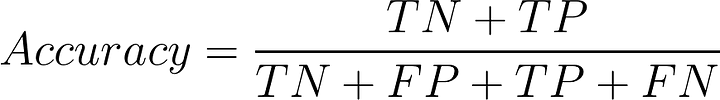)

In [ ]:
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy: {:.2f}%".format(rf_acc*100))

Random Forest Accuracy: 86.59%


![1_VXnUvOEdf3IiYVCD6Wd2vg[1].png](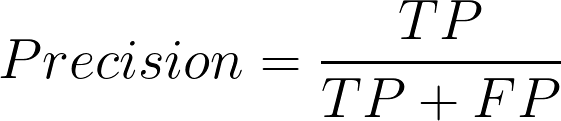)

![1_Aj3aYW4vwYAoJqyL36PVtQ[1].png](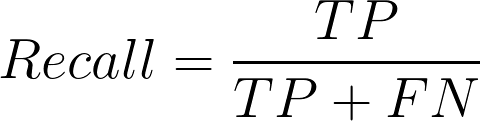)

![1_9uo7HN1pdMlMwTbNSdyO3A[1].png](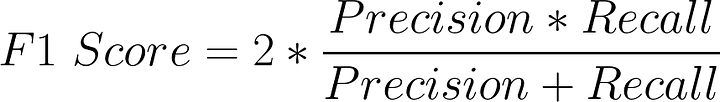)

In [ ]:
target_names = ['label: {0}'.format(i) for i in cleanData['label'].unique()]

#print(metrics.classification_report(y_test, rf.predict(X_test), target_names=target_names))
print(metrics.classification_report(y_test, rf_pred, target_names=target_names))

              precision    recall  f1-score   support

    label: 1       0.87      1.00      0.93     24845
    label: 0       0.00      0.00      0.00      3848

    accuracy                           0.87     28693
   macro avg       0.43      0.50      0.46     28693
weighted avg       0.75      0.87      0.80     28693



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#attributes = cleanData.drop(columns=['Close +1w change %','label','altLabel']).columns.tolist()
#i = 0
#for attribute in attributes:
#  print(i, attribute)
#  i=i+1

In [ ]:
#feature importance
#featI = pd.Series(rf.feature_importances_).sort_values(ascending=False)
#print(featI)

### xg boost

In [ ]:
# train an XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=11)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=11, ...)

In [ ]:
# Save the trained model to a file using joblib
joblib.dump(xgb_model, dataURL + 'models/XGBmodel_weekly.joblib')

['/content/drive/MyDrive/Colab Notebooks/NASDAQ_data/models/XGBmodel_weekly.joblib']

In [ ]:
# evaluate the XGBoost model
xgb_proba = xgb_model.predict_proba(X_test)

In [ ]:
xgb_pred = [1 if proba[1] >= 0.8 else 0 for proba in xgb_proba]
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy: {:.2f}%".format(xgb_acc*100))

XGBoost Accuracy: 87.24%


In [ ]:
# evaluate the XGBoost model
#xgb_pred = xgb_model.predict(X_test)
#xgb_acc = accuracy_score(y_test, xgb_pred)
#print("XGBoost Accuracy: {:.2f}%".format(xgb_acc*100))

In [ ]:
target_names = ['label: {0}'.format(i) for i in cleanData['label'].unique()]

print(metrics.classification_report(y_test, xgb_pred, target_names=target_names))

              precision    recall  f1-score   support

    label: 1       0.87      1.00      0.93     10014
    label: 0       0.33      0.00      0.00      1464

    accuracy                           0.87     11478
   macro avg       0.60      0.50      0.47     11478
weighted avg       0.80      0.87      0.81     11478



### tensorflow - keras

In [ ]:
X_train.shape

(562379, 52)

In [ ]:
# Define the number of numerical attributes
num_attributes = X_train.shape[1]

# Define the model architecture
TFmodel = keras.Sequential([
    keras.layers.Dense(52, activation='relu', input_shape=(num_attributes,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(52, activation='relu',),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
TFmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model on your data
TFmodel.fit(X_train, y_train, epochs=15, batch_size=16)


Epoch 1/15
35149/35149 [==============================] - 113s 3ms/step - loss: 0.4056 - accuracy: 0.8524
Epoch 2/15
35149/35149 [==============================] - 106s 3ms/step - loss: 0.4013 - accuracy: 0.8528
Epoch 3/15
35149/35149 [==============================] - 109s 3ms/step - loss: 0.3993 - accuracy: 0.8534
Epoch 4/15
35149/35149 [==============================] - 111s 3ms/step - loss: 0.3973 - accuracy: 0.8540
Epoch 5/15
35149/35149 [==============================] - 119s 3ms/step - loss: 0.3947 - accuracy: 0.8544
Epoch 6/15
35149/35149 [==============================] - 119s 3ms/step - loss: 0.3927 - accuracy: 0.8546
Epoch 7/15
35149/35149 [==============================] - 98s 3ms/step - loss: 0.3913 - accuracy: 0.8548
Epoch 8/15
35149/35149 [==============================] - 106s 3ms/step - loss: 0.3902 - accuracy: 0.8550
Epoch 9/15
35149/35149 [==============================] - 108s 3ms/step - loss: 0.3893 - accuracy: 0.8554
Epoch 10/15
35149/35149 [======================

In [ ]:
# Save the trained model to a file using joblib
joblib.dump(TFmodel, dataURL + 'models/TFmodel_weekly.joblib')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
......dense_5
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                 

['/content/drive/MyDrive/Colab Notebooks/NASDAQ_data/models/TFmodel_weekly.joblib']

In [ ]:
# Make predictions on your test data
y_pred_proba = TFmodel.predict(X_test)



359/359 [==============================] - 1s 3ms/step


In [ ]:
# Convert predicted probabilities to binary labels using a threshold of 0.8
y_pred = (y_pred_proba > 0.7).astype(int)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Evaluate the model performance using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print('Accuracy:', accuracy)
#print('Precision:', precision)
#print('Recall:', recall)
#print('F1-score:', f1_score)

Accuracy: 0.872277400243945


In [ ]:
target_names = ['label: {0}'.format(i) for i in cleanData['label'].unique()]

print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    label: 1       0.87      1.00      0.93     10014
    label: 0       0.00      0.00      0.00      1464

    accuracy                           0.87     11478
   macro avg       0.44      0.50      0.47     11478
weighted avg       0.76      0.87      0.81     11478



In [ ]:
y_pred

### tensorflow mixed model

#### temp

In [ ]:
# Extract inputs as a numpy array
'''
inputs_candles = cleanData[['Normalized candlestick open -0w',
					 'Normalized candlestick high -0w',
					 'Normalized candlestick low -0w',
					 'Normalized candlestick close -0w',
					 'Normalized candlestick open -1w',
					 'Normalized candlestick high -1w',
					 'Normalized candlestick low -1w',
					 'Normalized candlestick close -1w',
					 'Normalized candlestick open -2w',
					 'Normalized candlestick high -2w',
					 'Normalized candlestick low -2w',
					 'Normalized candlestick close -2w',
					 'Normalized candlestick open -3w',
					 'Normalized candlestick high -3w',
					 'Normalized candlestick low -3w',
					 'Normalized candlestick close -3w',
					 'Normalized candlestick open -4w',
					 'Normalized candlestick high -4w',
					 'Normalized candlestick low -4w',
					 'Normalized candlestick close -4w',
					 'Normalized candlestick open -5w',
					 'Normalized candlestick high -5w',
					 'Normalized candlestick low -5w',
					 'Normalized candlestick close -5w',
					 'Normalized candlestick open -6w',
					 'Normalized candlestick high -6w',
					 'Normalized candlestick low -6w',
					 'Normalized candlestick close -6w',
					 'Normalized candlestick open -7w',
					 'Normalized candlestick high -7w',
					 'Normalized candlestick low -7w',
					 'Normalized candlestick close -7w',
					 'Normalized candlestick open -8w',
					 'Normalized candlestick high -8w',
					 'Normalized candlestick low -8w',
					 'Normalized candlestick close -8w',
					 'Normalized candlestick open -9w',
					 'Normalized candlestick high -9w',
					 'Normalized candlestick low -9w',
					 'Normalized candlestick close -9w']].to_numpy()

inputs_volumes = cleanData[['Ticker Normalized Volume', 
					'sp500 normalized volume']].to_numpy()

inputs_stock_ratios = cleanData[['Ticker Price / SMA2',
						 'Ticker Price / SMA10',
						 'Ticker Price / SMA20',
						 'Ticker Price / SMA50',
						 'Ticker Price / SMA200']].to_numpy()

inputs_index_ratios = cleanData[['SP500 Price : SMA2',
						 'SP500 Price : SMA10',
						 'SP500 Price : SMA20',
						 'SP500 Price : SMA50',
						 'SP500 Price : SMA200']].to_numpy()
'''
#X_train = X.iloc[:trainData]
#X_test  = X.iloc[trainData:]
#y_train = y.iloc[:trainData]
#y_test  = y.iloc[trainData:]

#outputs = cleanData['label'].to_numpy()

# Concatenate inputs
#inputs = np.concatenate([inputs_candles, inputs_stock_ratios, inputs_index_ratios, inputs_volumes], axis=1)

# Convert outputs to one-hot encoding
#num_classes = 2
#outputs = tf.keras.utils.to_categorical(outputs, num_classes)

# Split data into training and testing sets
#train_ratio = 0.95
#num_train_samples = int(train_ratio * inputs.shape[0])
#train_inputs = inputs[:num_train_samples]   #X_train
#train_outputs = outputs[:num_train_samples] #y_train
#test_inputs = inputs[num_train_samples:]    #X_test
#test_outputs = outputs[num_train_samples:]  #y_test

"\ninputs_candles = cleanData[['Normalized candlestick open -0w',\n\t\t\t\t\t 'Normalized candlestick high -0w',\n\t\t\t\t\t 'Normalized candlestick low -0w',\n\t\t\t\t\t 'Normalized candlestick close -0w',\n\t\t\t\t\t 'Normalized candlestick open -1w',\n\t\t\t\t\t 'Normalized candlestick high -1w',\n\t\t\t\t\t 'Normalized candlestick low -1w',\n\t\t\t\t\t 'Normalized candlestick close -1w',\n\t\t\t\t\t 'Normalized candlestick open -2w',\n\t\t\t\t\t 'Normalized candlestick high -2w',\n\t\t\t\t\t 'Normalized candlestick low -2w',\n\t\t\t\t\t 'Normalized candlestick close -2w',\n\t\t\t\t\t 'Normalized candlestick open -3w',\n\t\t\t\t\t 'Normalized candlestick high -3w',\n\t\t\t\t\t 'Normalized candlestick low -3w',\n\t\t\t\t\t 'Normalized candlestick close -3w',\n\t\t\t\t\t 'Normalized candlestick open -4w',\n\t\t\t\t\t 'Normalized candlestick high -4w',\n\t\t\t\t\t 'Normalized candlestick low -4w',\n\t\t\t\t\t 'Normalized candlestick close -4w',\n\t\t\t\t\t 'Normalized candlestick open 

#### model

In [ ]:
X_train_np = X_train.to_numpy()  #train_inputs
X_test_np  = X_test.to_numpy()   #test_inputs
y_train_np = y_train.to_numpy()  #train_outputs
y_test_np  = y_test.to_numpy()   #test_outputs


In [ ]:
# Convert outputs to one-hot encoding
num_classes = 2
y_test_np = tf.keras.utils.to_categorical(y_test_np, num_classes)
y_train_np = tf.keras.utils.to_categorical(y_train_np, num_classes)

# Define model architecture
mixedModel = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_np.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
mixedModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = mixedModel.fit(X_train_np, y_train_np, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
14060/14060 [==============================] - 48s 3ms/step - loss: 0.4093 - accuracy: 0.8500 - val_loss: 0.3904 - val_accuracy: 0.8611
Epoch 2/10
14060/14060 [==============================] - 51s 4ms/step - loss: 0.4056 - accuracy: 0.8502 - val_loss: 0.3922 - val_accuracy: 0.8612
Epoch 3/10
14060/14060 [==============================] - 46s 3ms/step - loss: 0.4036 - accuracy: 0.8503 - val_loss: 0.3923 - val_accuracy: 0.8612
Epoch 4/10
14060/14060 [==============================] - 46s 3ms/step - loss: 0.4018 - accuracy: 0.8506 - val_loss: 0.3926 - val_accuracy: 0.8611
Epoch 5/10
14060/14060 [==============================] - 53s 4ms/step - loss: 0.4003 - accuracy: 0.8509 - val_loss: 0.3907 - val_accuracy: 0.8611
Epoch 6/10
14060/14060 [==============================] - 51s 4ms/step - loss: 0.3989 - accuracy: 0.8513 - val_loss: 0.3882 - val_accuracy: 0.8611
Epoch 7/10
14060/14060 [==============================] - 46s 3ms/step - loss: 0.3978 - accuracy: 0.8515 - val_loss: 0

In [ ]:
# Evaluate model on test set
#test_loss, test_acc = mixedModel.evaluate(X_test_np, y_test_np)
#print('Test accuracy:', test_acc)

In [ ]:
# Get model predictions on test set
#test_predictions = mixedModel.predict(test_inputs)

# Apply threshold to predictions
#test_predictions = (test_predictions[:,1] > 0.8).astype(int)

# Compute accuracy on test set with thresholded predictions
#test_accuracy = np.mean(test_predictions == np.argmax(test_outputs, axis=1))

#print('Test accuracy with thresholded predictions:', test_accuracy)

In [ ]:
mM_pred_proba = mixedModel.predict(X_test_np)

mM_pred = [1 if proba[1] >= 0.8 else 0 for proba in mM_pred_proba]

359/359 [==============================] - 1s 2ms/step


In [ ]:
target_names = ['label: {0}'.format(i) for i in cleanData['label'].unique()]

print(metrics.classification_report(y_test, mM_pred, target_names=target_names))

              precision    recall  f1-score   support

    label: 1       0.87      1.00      0.93     10014
    label: 0       0.00      0.00      0.00      1464

    accuracy                           0.87     11478
   macro avg       0.44      0.50      0.47     11478
weighted avg       0.76      0.87      0.81     11478



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
